[0 1 2 3]
3    827
0    826
1    822
2    395
Name: count, dtype: int64
(2870, 200, 200) (2870, 40000)


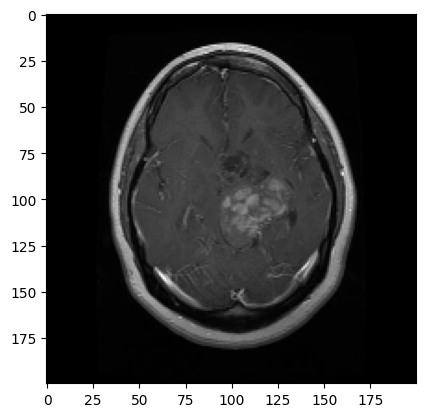

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2


path = 'C:/Users/yalin/OneDrive/Documents/ai_feb_2021/data/brain_tumor/Training/'
classes = {'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}

# Prepare data
X = []
Y = []
for cls in classes:
    pth = os.path.join(path, cls)
    if os.path.exists(pth):  # Check if the directory exists
        for j in os.listdir(pth):
            img = cv2.imread(os.path.join(pth, j), 0)
            img = cv2.resize(img, (200, 200))
            X.append(img)
            Y.append(classes[cls])
    else:
        print(f"Directory not found: {pth}")

X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)
print(np.unique(Y))
print(pd.Series(Y).value_counts())
print(X.shape, X_updated.shape)
plt.imshow(X[0], cmap='gray')


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import warnings

xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10, test_size=0.20)

xtrain = xtrain / 255
xtest = xtest / 255

pca = PCA(0.98)
pca_train = pca.fit_transform(xtrain)
pca_test = pca.transform(xtest)

print(pca_train.shape, pca_test.shape)

warnings.filterwarnings('ignore')

sv = SVC()
sv.fit(pca_train, ytrain)

lg = LogisticRegression(C=0.1)
lg.fit(pca_train, ytrain)

# Evaluation
print("Training Score (SVM):", sv.score(pca_train, ytrain))
print("Testing Score (SVM):", sv.score(pca_test, ytest))
print("Training Score (Logistic Regression):", lg.score(pca_train, ytrain))
print("Testing Score (Logistic Regression):", lg.score(pca_test, ytest))


(2296, 1282) (574, 1282)
Training Score (SVM): 0.962979094076655
Testing Score (SVM): 0.8344947735191638
Training Score (Logistic Regression): 0.9982578397212544
Testing Score (Logistic Regression): 0.8275261324041812


In [7]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
import os
import warnings

# Define path and classes
path = 'C:/Users/yalin/OneDrive/Documents/ai_feb_2021/data/brain_tumor/Training/'
classes = {'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}

# Prepare data
X = []
Y = []
for cls in classes:
    pth = os.path.join(path, cls)
    if os.path.exists(pth):
        for j in os.listdir(pth):
            img = cv2.imread(os.path.join(pth, j), 0)
            img = cv2.resize(img, (200, 200))
            X.append(img)
            Y.append(classes[cls])
    else:
        print(f"Directory not found: {pth}")

X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10, test_size=0.20)

xtrain = xtrain / 255
xtest = xtest / 255

# Apply PCA
pca = PCA(0.98)
pca_train = pca.fit_transform(xtrain)
pca_test = pca.transform(xtest)

# Train models
warnings.filterwarnings('ignore')

# Train SVM model
sv = SVC()
sv.fit(pca_train, ytrain)

# Train Logistic Regression model (if needed)
lg = LogisticRegression(C=0.1)
lg.fit(pca_train, ytrain)

# Evaluation
print("Training Score (SVM):", sv.score(pca_train, ytrain))
print("Testing Score (SVM):", sv.score(pca_test, ytest))
print("Training Score (Logistic Regression):", lg.score(pca_train, ytrain))
print("Testing Score (Logistic Regression):", lg.score(pca_test, ytest))


Training Score (SVM): 0.962979094076655
Testing Score (SVM): 0.8344947735191638
Training Score (Logistic Regression): 0.9982578397212544
Testing Score (Logistic Regression): 0.8275261324041812


Training Score (SVM): 0.962979094076655
Testing Score (SVM): 0.8344947735191638
Training Score (Logistic Regression): 0.9982578397212544
Testing Score (Logistic Regression): 0.8275261324041812


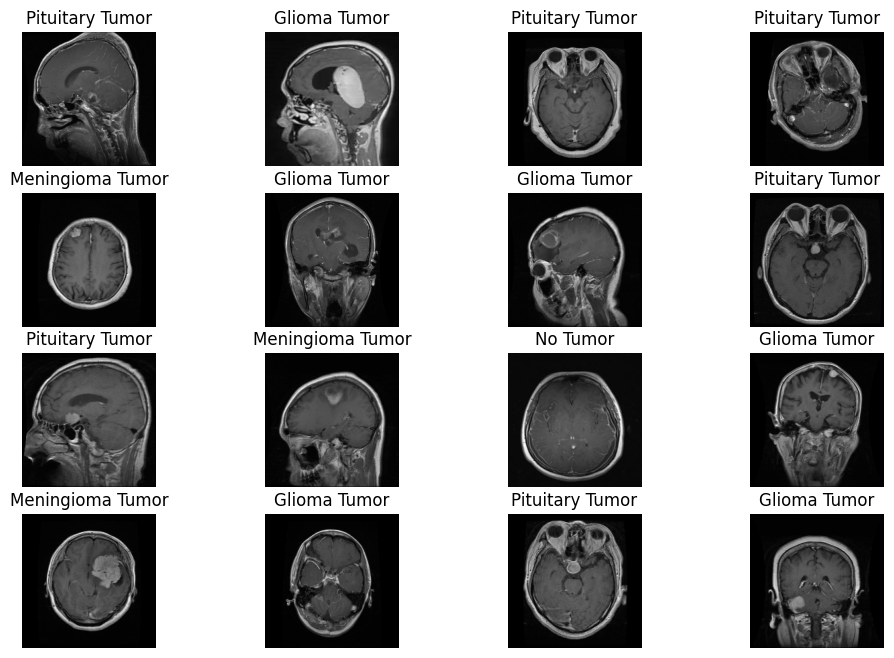

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import warnings

# Define path and classes
path = 'C:/Users/yalin/OneDrive/Documents/ai_feb_2021/data/brain_tumor/Training/'
classes = {'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}

# Prepare data
X = []
Y = []
for cls in classes:
    pth = os.path.join(path, cls)
    if os.path.exists(pth):
        for j in os.listdir(pth):
            img = cv2.imread(os.path.join(pth, j), 0)
            img = cv2.resize(img, (200, 200))
            X.append(img)
            Y.append(classes[cls])
    else:
        print(f"Directory not found: {pth}")

X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

# Split data
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10, test_size=0.20)

xtrain = xtrain / 255
xtest = xtest / 255

# Apply PCA
pca = PCA(0.98)
pca_train = pca.fit_transform(xtrain)
pca_test = pca.transform(xtest)

# Train models
warnings.filterwarnings('ignore')

# Train SVM model
sv = SVC()
sv.fit(pca_train, ytrain)

# Train Logistic Regression model (if needed)
lg = LogisticRegression(C=0.1)
lg.fit(pca_train, ytrain)

# Evaluation
print("Training Score (SVM):", sv.score(pca_train, ytrain))
print("Testing Score (SVM):", sv.score(pca_test, ytest))
print("Training Score (Logistic Regression):", lg.score(pca_train, ytrain))
print("Testing Score (Logistic Regression):", lg.score(pca_test, ytest))

# Mapping of class indices to labels
dec = {0: 'Glioma Tumor', 1: 'Meningioma Tumor', 2: 'No Tumor', 3: 'Pituitary Tumor'}

# Visualization of predictions
plt.figure(figsize=(12, 8))

for i in range(16):  # Adjust the number of images displayed as needed
    plt.subplot(4, 4, i + 1)
    img = xtest[i].reshape(200, 200)
    pca_img = pca_test[i].reshape(1, -1)
    pred = sv.predict(pca_img)
    plt.title(dec[pred[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.show()


Training Score (SVM): 0.962979094076655
Testing Score (SVM): 0.8344947735191638
Training Score (Logistic Regression): 0.9982578397212544
Testing Score (Logistic Regression): 0.8275261324041812


NameError: name 'dec' is not defined

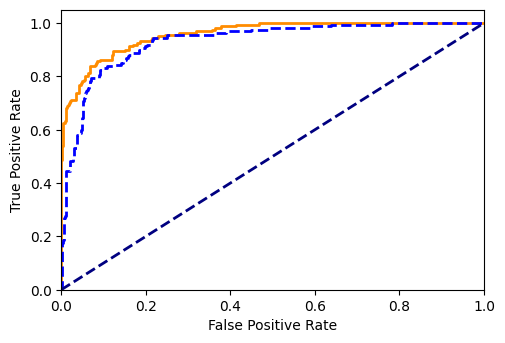

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import RocCurveDisplay
import warnings

# Define path and classes
path = 'C:/Users/yalin/OneDrive/Documents/ai_feb_2021/data/brain_tumor/Training/'
classes = {'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}

# Prepare data
X = []
Y = []
for cls in classes:
    pth = os.path.join(path, cls)
    if os.path.exists(pth):
        for j in os.listdir(pth):
            img = cv2.imread(os.path.join(pth, j), 0)
            img = cv2.resize(img, (200, 200))
            X.append(img)
            Y.append(classes[cls])
    else:
        print(f"Directory not found: {pth}")

X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

# Split data
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10, test_size=0.20)

xtrain = xtrain / 255
xtest = xtest / 255

# Apply PCA
pca = PCA(0.98)
pca_train = pca.fit_transform(xtrain)
pca_test = pca.transform(xtest)

# Binarize the output labels for ROC curves
ytrain_bin = label_binarize(ytrain, classes=[0, 1, 2, 3])
ytest_bin = label_binarize(ytest, classes=[0, 1, 2, 3])

# Train models
warnings.filterwarnings('ignore')

# Train SVM model with probability estimates
sv = SVC(probability=True)
sv.fit(pca_train, ytrain)

# Train Logistic Regression model (if needed)
lg = LogisticRegression(C=0.1)
lg.fit(pca_train, ytrain)

# Evaluation
print("Training Score (SVM):", sv.score(pca_train, ytrain))
print("Testing Score (SVM):", sv.score(pca_test, ytest))
print("Training Score (Logistic Regression):", lg.score(pca_train, ytrain))
print("Testing Score (Logistic Regression):", lg.score(pca_test, ytest))

# Compute ROC curve and ROC area for each class
fpr_svm = dict()
tpr_svm = dict()
roc_auc_svm = dict()

fpr_lr = dict()
tpr_lr = dict()
roc_auc_lr = dict()

for i in range(4):
    fpr_svm[i], tpr_svm[i], _ = roc_curve(ytest_bin[:, i], sv.predict_proba(pca_test)[:, i])
    roc_auc_svm[i] = auc(fpr_svm[i], tpr_svm[i])

    fpr_lr[i], tpr_lr[i], _ = roc_curve(ytest_bin[:, i], lg.predict_proba(pca_test)[:, i])
    roc_auc_lr[i] = auc(fpr_lr[i], tpr_lr[i])

# Plot all ROC curves
plt.figure(figsize=(12, 8))

for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.plot(fpr_svm[i], tpr_svm[i], color='darkorange', lw=2, label=f'SVM (AUC = {roc_auc_svm[i]:.2f})')
    plt.plot(fpr_lr[i], tpr_lr[i], color='blue', lw=2, linestyle='--', label=f'Logistic Regression (AUC = {roc_auc_lr[i]:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for class {dec[i]}')
    plt.legend(loc='lower right')

plt.tight_layout()
plt.show()


Training Score (SVM): 0.962979094076655
Testing Score (SVM): 0.8344947735191638
Training Score (Logistic Regression): 0.9982578397212544
Testing Score (Logistic Regression): 0.8275261324041812


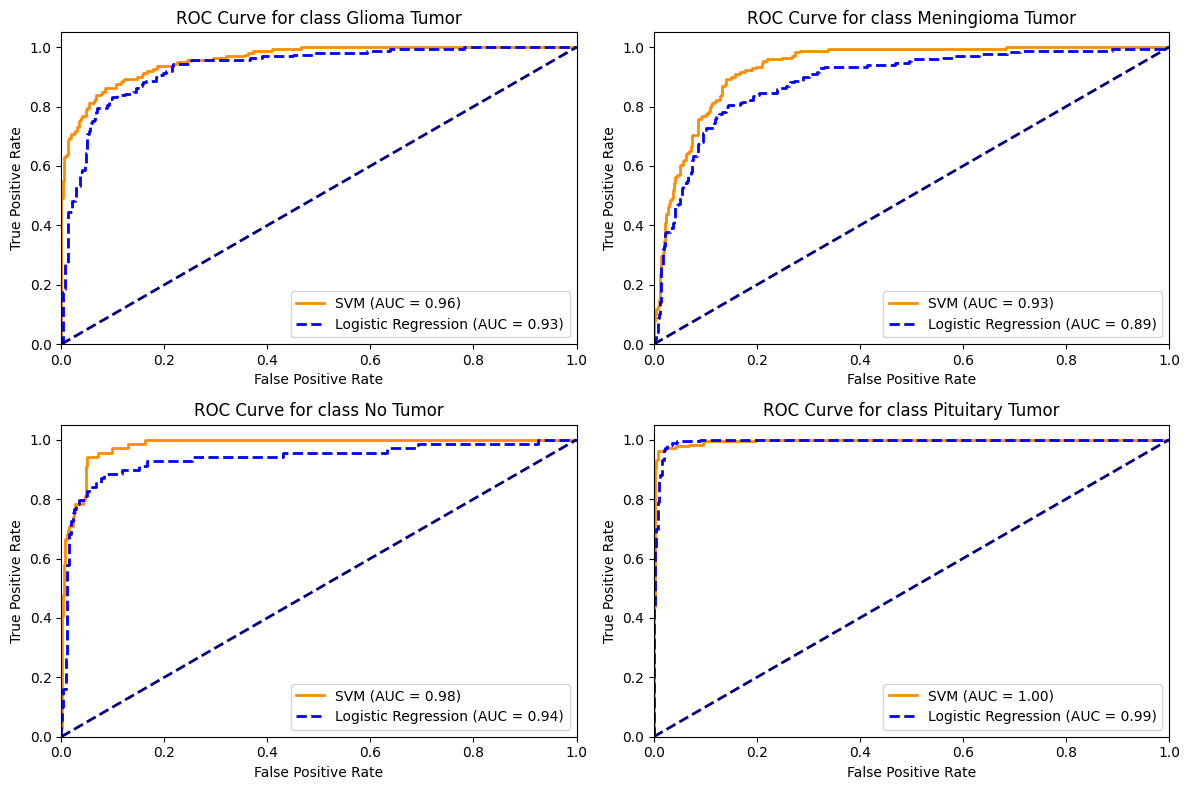

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import warnings

# Define path and classes
path = 'C:/Users/yalin/OneDrive/Documents/ai_feb_2021/data/brain_tumor/Training/'
classes = {'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}

# Prepare data
X = []
Y = []
for cls in classes:
    pth = os.path.join(path, cls)
    if os.path.exists(pth):
        for j in os.listdir(pth):
            img = cv2.imread(os.path.join(pth, j), 0)
            img = cv2.resize(img, (200, 200))
            X.append(img)
            Y.append(classes[cls])
    else:
        print(f"Directory not found: {pth}")

X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

# Split data
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10, test_size=0.20)

xtrain = xtrain / 255
xtest = xtest / 255

# Apply PCA
pca = PCA(0.98)
pca_train = pca.fit_transform(xtrain)
pca_test = pca.transform(xtest)

# Binarize the output labels for ROC curves
ytrain_bin = label_binarize(ytrain, classes=[0, 1, 2, 3])
ytest_bin = label_binarize(ytest, classes=[0, 1, 2, 3])

# Train models
warnings.filterwarnings('ignore')

# Train SVM model with probability estimates
sv = SVC(probability=True)
sv.fit(pca_train, ytrain)

# Train Logistic Regression model (if needed)
lg = LogisticRegression(C=0.1)
lg.fit(pca_train, ytrain)

# Evaluation
print("Training Score (SVM):", sv.score(pca_train, ytrain))
print("Testing Score (SVM):", sv.score(pca_test, ytest))
print("Training Score (Logistic Regression):", lg.score(pca_train, ytrain))
print("Testing Score (Logistic Regression):", lg.score(pca_test, ytest))

# Mapping of class indices to labels
dec = {0: 'Glioma Tumor', 1: 'Meningioma Tumor', 2: 'No Tumor', 3: 'Pituitary Tumor'}

# Compute ROC curve and ROC area for each class
fpr_svm = dict()
tpr_svm = dict()
roc_auc_svm = dict()

fpr_lr = dict()
tpr_lr = dict()
roc_auc_lr = dict()

for i in range(4):
    fpr_svm[i], tpr_svm[i], _ = roc_curve(ytest_bin[:, i], sv.predict_proba(pca_test)[:, i])
    roc_auc_svm[i] = auc(fpr_svm[i], tpr_svm[i])

    fpr_lr[i], tpr_lr[i], _ = roc_curve(ytest_bin[:, i], lg.predict_proba(pca_test)[:, i])
    roc_auc_lr[i] = auc(fpr_lr[i], tpr_lr[i])

# Plot all ROC curves
plt.figure(figsize=(12, 8))

for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.plot(fpr_svm[i], tpr_svm[i], color='darkorange', lw=2, label=f'SVM (AUC = {roc_auc_svm[i]:.2f})')
    plt.plot(fpr_lr[i], tpr_lr[i], color='blue', lw=2, linestyle='--', label=f'Logistic Regression (AUC = {roc_auc_lr[i]:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for class {dec[i]}')
    plt.legend(loc='lower right')

plt.tight_layout()
plt.show()
